In [862]:
#Import Tools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import openpyxl

In [863]:
# Gives adjacency dictionary (not mine)
edge_dict={}
def create_edge_dict(graph):
    for i, n in G.adjacency():
        # print("i is",i)
        # print("n is",n)
        edge_dict[i] = list(n)
    return edge_dict

# Gives duplicate items in a list (not mine)
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list( seen_twice )


#(https://www.geeksforgeeks.org/python-merge-two-lists-into-list-of-tuples/)
def merge(list1, list2):
      
    merged_list = []
    for i in range(max((len(list1), len(list2)))):
  
        while True:
            try:
                tup = (list1[i], list2[i])
            except IndexError:
                if len(list1) > len(list2):
                    list2.append('')
                    tup = (list1[i], list2[i])
                elif len(list1) < len(list2):
                    list1.append('')
                    tup = (list1[i], list2[i])
                continue
  
            merged_list.append(tup)
            break
    return merged_list


# function to check whether the list is empty or not
def is_list_empty(list):
    # checking the length
    if len(list) == 0:
        # returning true as length is 0
        return True
    # returning false as length is greater than 0
    return False

In [864]:
# #retrieve data regarding vacant spaces
from openpyxl import load_workbook
workbook = load_workbook(filename="Node_Information_UGC1.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

# #create dictionary based on excel worksheet
vacant_spaces={}
for value in sheet1.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        vacant_spaces[value[0]]={}
        vacant_spaces[value[0]]["location"]=value[1]
        vacant_spaces[value[0]]["tag"]=value[6]
        vacant_spaces[value[0]]["building"]=value[3]
        vacant_spaces[value[0]]["size_real"]=int(value[2])
        vacant_spaces[value[0]]["loc_building"]=value[4]
        vacant_spaces[value[0]]["orientation"]=value[5]
        vacant_spaces[value[0]]["node_type"]="vacant"

#interpret data
#Rules:
#structure (roof:1,ground:3,outside:3,basement:3,intermediate:2)
#solar (roof:3,
#       basement:1
#       ground & S,SW,SE:3,
#       ground $ E,W:2
#       ground $ N,NE,NW:1
#       outside & S,SW,SE:3,
#       outside $ E,W:2
#       outside $ N,NE,NW:1
#       intermediate & S,SW,SE:3,
#       intermediate & E,W:2
#       intermediate & N,NE,NW:1
#size (0-100 size:1)
#     (101-500 size:2)
#     (500-... size:3)

for space in vacant_spaces:
    if vacant_spaces[space]["loc_building"]=="roof":
        vacant_spaces[space]["structure"]=1
        vacant_spaces[space]["solar"]=3
    if vacant_spaces[space]["loc_building"]=="basement":
        vacant_spaces[space]["structure"]=3
        vacant_spaces[space]["solar"]=1
    if (vacant_spaces[space]["loc_building"]=="ground") and (((vacant_spaces[space]["orientation"])=="S") or ((vacant_spaces[space]["orientation"])=="SE") or ((vacant_spaces[space]["orientation"])=="SW")):
        vacant_spaces[space]["solar"]=3
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="ground") and (((vacant_spaces[space]["orientation"])=="N") or ((vacant_spaces[space]["orientation"])=="NE") or ((vacant_spaces[space]["orientation"])=="NW")):
        vacant_spaces[space]["solar"]=1
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="ground") and (((vacant_spaces[space]["orientation"])=="E") or ((vacant_spaces[space]["orientation"])=="W")):
        vacant_spaces[space]["solar"]=2
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="intermediate") and (((vacant_spaces[space]["orientation"])=="S") or ((vacant_spaces[space]["orientation"])=="SE") or ((vacant_spaces[space]["orientation"])=="SW")):
        vacant_spaces[space]["solar"]=3
        vacant_spaces[space]["structure"]=2
    if (vacant_spaces[space]["loc_building"]=="intermediate") and (((vacant_spaces[space]["orientation"])=="N") or ((vacant_spaces[space]["orientation"])=="NE") or ((vacant_spaces[space]["orientation"])=="NW")):
        vacant_spaces[space]["solar"]=1
        vacant_spaces[space]["structure"]=2
    if (vacant_spaces[space]["loc_building"]=="intermediate") and (((vacant_spaces[space]["orientation"])=="E") or ((vacant_spaces[space]["orientation"])=="W")):
        vacant_spaces[space]["solar"]=2
        vacant_spaces[space]["structure"]=2
    if (vacant_spaces[space]["loc_building"]=="outside") and (((vacant_spaces[space]["orientation"])=="S") or ((vacant_spaces[space]["orientation"])=="SE") or ((vacant_spaces[space]["orientation"])=="SW")):
        vacant_spaces[space]["solar"]=3
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="outside") and (((vacant_spaces[space]["orientation"])=="N") or ((vacant_spaces[space]["orientation"])=="NE") or ((vacant_spaces[space]["orientation"])=="NW")):
        vacant_spaces[space]["solar"]=1
        vacant_spaces[space]["structure"]=3
    if (vacant_spaces[space]["loc_building"]=="outside") and (((vacant_spaces[space]["orientation"])=="E") or ((vacant_spaces[space]["orientation"])=="W")):
        vacant_spaces[space]["solar"]=2
        vacant_spaces[space]["structure"]=3

#interpret size based on predefined ranges
for space in vacant_spaces:
    if vacant_spaces[space]["size_real"]<=500:
        vacant_spaces[space]["size"]=1
    if (vacant_spaces[space]["size_real"]>500) and (vacant_spaces[space]["size_real"]<=800) :
        vacant_spaces[space]["size"]=2
    if (vacant_spaces[space]["size_real"]>800):
        vacant_spaces[space]["size"]=3
    
#remove orientation,loc_building,size_real
for space in vacant_spaces:
    vacant_spaces[space].pop("orientation")
    vacant_spaces[space].pop("size_real")
    vacant_spaces[space].pop("loc_building")   
     
#retrieve waste sources
#create dictionary based on excel worksheet
wastes={}
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
            wastes[value[0]]={}
            wastes[value[0]]["location"]=value[1]
            wastes[value[0]]["tag"]=value[5]
            wastes[value[0]]["type"]=value[3]
# print(wastes)

In [865]:
print(vacant_spaces)

{'V0': {'location': '{-803.904692, 34.790488, 0}', 'tag': 'V0', 'building': 'V0', 'node_type': 'vacant', 'solar': 3, 'structure': 3, 'size': 3}, 'V1': {'location': '{-724.997122, -1.092597, 0}', 'tag': 'V1', 'building': 'V1', 'node_type': 'vacant', 'solar': 3, 'structure': 3, 'size': 3}, 'V2': {'location': '{-743.096854, 48.585595, 0}', 'tag': 'V2', 'building': 'V2', 'node_type': 'vacant', 'solar': 3, 'structure': 3, 'size': 3}, 'V3': {'location': '{-778.018835, 6.722332, 0}', 'tag': 'V3', 'building': 'V3', 'node_type': 'vacant', 'solar': 3, 'structure': 3, 'size': 2}, 'V4': {'location': '{-757.014994, 25.984151, 0}', 'tag': 'V4', 'building': 'V4', 'node_type': 'vacant', 'solar': 3, 'structure': 3, 'size': 2}, 'V5': {'location': '{-673.392951, 50.552091, 0}', 'tag': 'V5', 'building': 'V5', 'node_type': 'vacant', 'solar': 2, 'structure': 3, 'size': 1}, 'V6': {'location': '{-664.923643, 35.208772, 0}', 'tag': 'V6', 'building': 'V6', 'node_type': 'vacant', 'solar': 2, 'structure': 3, 'siz

In [866]:
#retrieve connections between vacant spaces within radius=x
url1="https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/Edges_vacant300_UGC.txt"
resp1 = requests.get(url1)
edges1 = json.loads(resp1.text)
#converts nested lists into a list of tuples
nearby_space100  = [tuple(i) for i in edges1]

#retrieve connections within radius=x with identifiers
url1="https://raw.githubusercontent.com/erengozdeanil/UF-DecisionMaker/main/Edges_try3_UGC.txt"
resp1 = requests.get(url1)
edges1 = json.loads(resp1.text)
#converts nested lists into a list of tuples
nearby_waste100 = [tuple(i) for i in edges1]
# print(waste_nearby100,len(waste_nearby100))

In [867]:
for waste in wastes:
    for couple in nearby_waste100:
        if wastes[waste]["type"]=="None":
            if waste in couple:
                print(couple, "removed")
                nearby_waste100.remove(couple)
                (couple,"removed")
# print(nearby_waste100,len(nearby_waste100))

In [868]:
for couple in nearby_space100:
    if couple[0]==couple[1]:
        nearby_space100.remove(couple)
print(nearby_space100)

[('V0', 'V3'), ('V0', 'V4'), ('V0', 'V2'), ('V0', 'V1'), ('V0', 'V5'), ('V0', 'V6'), ('V1', 'V4'), ('V1', 'V2'), ('V1', 'V3'), ('V1', 'V6'), ('V1', 'V5'), ('V1', 'V0'), ('V2', 'V4'), ('V2', 'V1'), ('V2', 'V3'), ('V2', 'V0'), ('V2', 'V5'), ('V2', 'V6'), ('V3', 'V4'), ('V3', 'V0'), ('V3', 'V1'), ('V3', 'V2'), ('V3', 'V5'), ('V3', 'V6'), ('V4', 'V2'), ('V4', 'V3'), ('V4', 'V1'), ('V4', 'V0'), ('V4', 'V5'), ('V4', 'V6'), ('V5', 'V6'), ('V5', 'V2'), ('V5', 'V1'), ('V5', 'V4'), ('V5', 'V3'), ('V5', 'V0'), ('V6', 'V5'), ('V6', 'V1'), ('V6', 'V2'), ('V6', 'V4'), ('V6', 'V3'), ('V6', 'V0')]


In [869]:
workbook = load_workbook(filename="Node_Information_UGC1.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]
wastes={}
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        if value[4]!=0:
            wastes[value[0]]={}
            wastes[value[0]]["location"]=value[1]
            wastes[value[0]]["source"]=value[2]
            wastes[value[0]]["tag"]=value[5]
            wastes[value[0]]["type"]=value[3]
            wastes[value[0]]["size"]=int(value[4])
            wastes[value[0]]["node_type"]="waste"


#assign ranges to quantities
# for waste in wastes:
    # if wastes[waste]["type"]=="W1":
    #     if wastes[waste]["quantity"]<= 183705:
    #         wastes[waste]["size"]=1
    #     if (wastes[waste]["quantity"]>183705) and (wastes[waste]["quantity"]<=918523):
    #         wastes[waste]["size"]=2
    #     if wastes[waste]["quantity"]>918523:
    #         wastes[waste]["size"]=3
    # if wastes[waste]["type"]=="W2":
    #     if wastes[waste]["quantity"]<= 67500:
    #         wastes[waste]["size"]=1
    #     if (wastes[waste]["quantity"]>67500) and (wastes[waste]["quantity"]<=337500):
    #         wastes[waste]["size"]=2
    #     if wastes[waste]["quantity"]>337500:
    #         wastes[waste]["size"]=3
    # if wastes[waste]["type"]=="W3":
    #     if wastes[waste]["quantity"]<= 11813:
    #         wastes[waste]["size"]=1
    #     if (wastes[waste]["quantity"]>11813) and (wastes[waste]["quantity"]<=59063):
    #         wastes[waste]["size"]=2
    #     if wastes[waste]["quantity"]>59063:
    #         wastes[waste]["size"]=3
    # if wastes[waste]["type"]=="W4":
    #     if wastes[waste]["quantity"]<= 28200:
    #         wastes[waste]["size"]=1
    #     if (wastes[waste]["quantity"]>28200) and (wastes[waste]["quantity"]<=141000):
    #         wastes[waste]["size"]=2
    #     if wastes[waste]["quantity"]>141000:
    #         wastes[waste]["size"]=3
    # if wastes[waste]["type"]=="W5":
    #     if wastes[waste]["quantity"]<= 19342:
    #         wastes[waste]["size"]=1
    #     if (wastes[waste]["quantity"]>19342) and (wastes[waste]["quantity"]<=96710):
    #         wastes[waste]["size"]=2
    #     if wastes[waste]["quantity"]>96710:
    #         wastes[waste]["size"]=3
    # if wastes[waste]["type"]=="W6":
    #     if wastes[waste]["quantity"]<= 1560000:
    #         wastes[waste]["size"]=1
    #     if (wastes[waste]["quantity"]>1560000) and (wastes[waste]["quantity"]<=7800000):
    #         wastes[waste]["size"]=2
    #     if wastes[waste]["quantity"]>7800000:
    #         wastes[waste]["size"]=3
    # if wastes[waste]["type"]=="W7":
    #     if wastes[waste]["quantity"]<= 200000:
    #         wastes[waste]["size"]=1
    #     if (wastes[waste]["quantity"]>200000) and (wastes[waste]["quantity"]<=1000000):
    #         wastes[waste]["size"]=2
    #     if wastes[waste]["quantity"]>1000000:
    #         wastes[waste]["size"]=3

In [870]:
#Dictionary of urban farming systems
    # UF1: Vermiculture, UF2: Aquaculture, UF3: Mushroom, UF4: NFT, UF5: Medai Beds, UF6: Raised Beds, UF7: Water Culture, UF8: Plant Factory, UF9: Aeroponics
    # "S" : supplementary system, "F" : food production system
    # 3 : high, 2 : medium, 1 : low, 0 : none
uf_systems = {
"UF1":{"tag":"UF1","type":"S","weight":3,"solar":1,"in":["W1","W2","W3","W6"],"supplement":None,"out":["S4","S5"]},
"UF2":{"tag":"UF2","type":"SF","weight":3,"solar":2,"in":["W7"],"supplement":["S5"],"out":["O4","S2"]},
"UF3":{"tag":"UF3","type":"F","weight":2,"solar":1,"in":["W2","W3","W4","W6"],"supplement":None,"out":["O3","S4"]},
"UF4":{"tag":"UF4","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF5":{"tag":"UF5","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","O2","W1"]},
"UF6":{"tag":"UF6","type":"F","weight":3,"solar":3,"in":["W6"],"supplement":["S4"],"out":["O1","O2","W1"]},
"UF7":{"tag":"UF7","type":"F","weight":3,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]},
"UF8":{"tag":"UF8","type":"F","weight":3,"solar":1,"in":["W5","W6"],"supplement":["S2"],"out":["O1","W1","W7"]},
"UF9":{"tag":"UF9","type":"F","weight":1,"solar":3,"in":["W5","W6","W7"],"supplement":["S2"],"out":["O1","W1"]}
}

critical_items=["W1","W2","W3", "W4"]
non_critical_items=["W5","W6","W7"]

In [871]:
print(wastes)

{'WO0': {'location': '{-689.802413, 23.741236, 0}', 'source': 'cafe', 'tag': 'WO0', 'type': 'W6', 'size': 3, 'node_type': 'waste'}, 'WO1': {'location': '{-683.915012, 28.756529, 0}', 'source': 'cafe', 'tag': 'WO1', 'type': 'W1', 'size': 3, 'node_type': 'waste'}, 'WO2': {'location': '{-677.172337, 23.553906, 0}', 'source': 'cafe', 'tag': 'WO2', 'type': 'W4', 'size': 3, 'node_type': 'waste'}, 'WO3': {'location': '{-697.587895, 50.744049, 0}', 'source': 'community', 'tag': 'WO3', 'type': 'W6', 'size': 3, 'node_type': 'waste'}, 'WO4': {'location': '{-820.161616, 49.441107, 0}', 'source': 'makers', 'tag': 'WO4', 'type': 'W6', 'size': 3, 'node_type': 'waste'}, 'WO5': {'location': '{-811.057505, 51.355828, 0}', 'source': 'makers', 'tag': 'WO5', 'type': 'W2', 'size': 3, 'node_type': 'waste'}, 'WO6': {'location': '{-1266.789423, 45.775932, 0}', 'source': 'school1', 'tag': 'WO6', 'type': 'W3', 'size': 3, 'node_type': 'waste'}, 'WO7': {'location': '{-1201.863458, 141.943154, 0}', 'source': 'schoo

0. Prepare Data For Decision Making

In [872]:
#Make a dictionary of vacant spaces and potential uf systems
v_potential = {}
for k,v in vacant_spaces.items():
    uf_list=[]
    for j,y in uf_systems.items():
        if (vacant_spaces[k]["structure"])>=(uf_systems[j]["weight"]) and (vacant_spaces[k]["solar"])==(uf_systems[j]["solar"]) and (uf_systems[j]["type"]=="F"):
            v_potential[k]={}
            uf_list.append(uf_systems[j]["tag"])
            v_potential[k]["tag"]=vacant_spaces[k]["tag"]
            v_potential[k]["UF"]=uf_list
# print(v_potential)

# for couple_count in range(len(nearby_waste100)):
#     for couple in nearby_waste100:
        
#         for index,item in enumerate(couple):
#             if vacant_spaces[couple[0]]["building"]!=wastes[couple[1]]["source"]:
#                 print(couple,vacant_spaces[couple[0]]["building"],wastes[couple[1]]["source"],wastes[couple[1]]["type"])
#                 if (wastes[couple[1]]["type"]=="W5") or (wastes[couple[1]]["type"]=="W6") or (wastes[couple[1]]["type"]=="W7"):
#                     if couple in nearby_waste100:
#                         print(couple,wastes[couple[1]]["type"])
#                         print("removed",couple,wastes[couple[1]]["type"],vacant_spaces[couple[0]]["building"],wastes[couple[1]]["source"],wastes[couple[1]]["type"])
#                         nearby_waste100.remove(couple)
#         else:
#             print(couple,"not in nearby_waste100")
                

print(nearby_waste100)  


[('V0', 'WO5'), ('V0', 'WO4'), ('V0', 'WO3'), ('V0', 'WO0'), ('V0', 'WO1'), ('V0', 'WO2'), ('V0', 'WO7'), ('V0', 'WO6'), ('V1', 'WO0'), ('V1', 'WO1'), ('V1', 'WO2'), ('V1', 'WO3'), ('V1', 'WO5'), ('V1', 'WO4'), ('V1', 'WO7'), ('V1', 'WO6'), ('V2', 'WO3'), ('V2', 'WO0'), ('V2', 'WO1'), ('V2', 'WO5'), ('V2', 'WO2'), ('V2', 'WO4'), ('V2', 'WO7'), ('V2', 'WO6'), ('V3', 'WO5'), ('V3', 'WO4'), ('V3', 'WO0'), ('V3', 'WO3'), ('V3', 'WO1'), ('V3', 'WO2'), ('V3', 'WO7'), ('V3', 'WO6'), ('V4', 'WO5'), ('V4', 'WO3'), ('V4', 'WO0'), ('V4', 'WO4'), ('V4', 'WO1'), ('V4', 'WO2'), ('V4', 'WO7'), ('V4', 'WO6'), ('V5', 'WO3'), ('V5', 'WO1'), ('V5', 'WO2'), ('V5', 'WO0'), ('V5', 'WO5'), ('V5', 'WO4'), ('V5', 'WO7'), ('V5', 'WO6'), ('V6', 'WO2'), ('V6', 'WO1'), ('V6', 'WO0'), ('V6', 'WO3'), ('V6', 'WO5'), ('V6', 'WO4'), ('V6', 'WO7'), ('V6', 'WO6')]


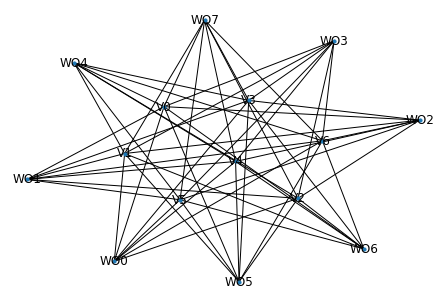

In [873]:
# Draw Graph with nodes and edges with coordinates
G=nx.Graph()
for i,j in vacant_spaces.items():
    G.add_node(i)
G.add_edges_from(nearby_waste100)
nx.draw(G, with_labels=True, node_size=10)

# Create a dictionary with vacant spaces and waste outputs them
new_waste_dict = create_edge_dict(G)
waste_dict = {}
for i,k in new_waste_dict.items():
    if i in vacant_spaces:
        waste_dict[i]=k
        
#List of dictionaries we will use:
# print(v_potential)
# print(waste_dict)
# print(uf_systems)

# add needed inputs for each potential system into the v_potential dictionary
v_potential_dict={}
for i,k in v_potential.items():
    v_potential_dict[i]={}
    potential_systems = v_potential[i]["UF"]
    for item in potential_systems:
       v_potential_dict[i][item] = uf_systems[item]["in"]
        
#Design Rule 1.0 : Waste Availability
    #if there are more than 2 found items assign that system to that vacant space
    
    

In [874]:
print(v_potential)

{'V0': {'tag': 'V0', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V1': {'tag': 'V1', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V2': {'tag': 'V2', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V3': {'tag': 'V3', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}, 'V4': {'tag': 'V4', 'UF': ['UF4', 'UF5', 'UF6', 'UF7', 'UF9']}}


Design Rule 3.0 : Sharing Existing Resources
    

Prepare Data

In [875]:
# Preparation of Data
#Make a dictionary of found items nearby for each potential uf system
found_dict={}

for i,k in v_potential_dict.items():
    found_dict[i]={}
    for system,demanded in k.items():
        found_dict[i][system]={}
        found_dict[i][system]["found"]={}
        found_dict[i][system]["source"]={}
        found=[]
        source=[]
        for waste in waste_dict[i]:
            for each in demanded: 
                available = wastes[waste]["type"]
                source2 = wastes[waste]["tag"]
                print(i,wastes[waste])
                source_size = wastes[waste]["size"]
                if each == available:
                    found.append(available)
                    source.append(source2)
                    found_dict[i][system]["found"]=found
                    found_dict[i][system]["source"]=source


V0 {'location': '{-811.057505, 51.355828, 0}', 'source': 'makers', 'tag': 'WO5', 'type': 'W2', 'size': 3, 'node_type': 'waste'}
V0 {'location': '{-811.057505, 51.355828, 0}', 'source': 'makers', 'tag': 'WO5', 'type': 'W2', 'size': 3, 'node_type': 'waste'}
V0 {'location': '{-811.057505, 51.355828, 0}', 'source': 'makers', 'tag': 'WO5', 'type': 'W2', 'size': 3, 'node_type': 'waste'}
V0 {'location': '{-820.161616, 49.441107, 0}', 'source': 'makers', 'tag': 'WO4', 'type': 'W6', 'size': 3, 'node_type': 'waste'}
V0 {'location': '{-820.161616, 49.441107, 0}', 'source': 'makers', 'tag': 'WO4', 'type': 'W6', 'size': 3, 'node_type': 'waste'}
V0 {'location': '{-820.161616, 49.441107, 0}', 'source': 'makers', 'tag': 'WO4', 'type': 'W6', 'size': 3, 'node_type': 'waste'}
V0 {'location': '{-697.587895, 50.744049, 0}', 'source': 'community', 'tag': 'WO3', 'type': 'W6', 'size': 3, 'node_type': 'waste'}
V0 {'location': '{-697.587895, 50.744049, 0}', 'source': 'community', 'tag': 'WO3', 'type': 'W6', 'si

In [876]:
#Make a dictionary of missing for each potential uf system           
for i,system in found_dict.items():
    for uf in system:
        missing=[]
        found_dict[i][uf]["missing"]={}
        for x,y in uf_systems.items():
            for item in uf_systems[x]["in"]:
                if uf == x:
                    missing.append(item)
                    found_dict[i][uf]["missing"]=missing
        
#In the dictionary missing items also contain found items
for i,k in found_dict.items():
    for system in k:
        for item in (found_dict[i][system]["found"]):
            if item in found_dict[i][system]["missing"]:
                missing_list=found_dict[i][system]["missing"]
                missing_list.remove(item)

#reach sizes of duplicate items
for i,k in found_dict.items():
    for system in k:
        found_items=found_dict[i][system]["found"]


In [877]:
print(found_dict)

{'V0': {'UF4': {'found': ['W6', 'W6', 'W6'], 'source': ['WO4', 'WO3', 'WO0'], 'missing': ['W5', 'W7']}, 'UF5': {'found': ['W6', 'W6', 'W6'], 'source': ['WO4', 'WO3', 'WO0'], 'missing': ['W5', 'W7']}, 'UF6': {'found': ['W6', 'W6', 'W6'], 'source': ['WO4', 'WO3', 'WO0'], 'missing': []}, 'UF7': {'found': ['W6', 'W6', 'W6'], 'source': ['WO4', 'WO3', 'WO0'], 'missing': ['W5', 'W7']}, 'UF9': {'found': ['W6', 'W6', 'W6'], 'source': ['WO4', 'WO3', 'WO0'], 'missing': ['W5', 'W7']}}, 'V1': {'UF4': {'found': ['W6', 'W6', 'W6'], 'source': ['WO0', 'WO3', 'WO4'], 'missing': ['W5', 'W7']}, 'UF5': {'found': ['W6', 'W6', 'W6'], 'source': ['WO0', 'WO3', 'WO4'], 'missing': ['W5', 'W7']}, 'UF6': {'found': ['W6', 'W6', 'W6'], 'source': ['WO0', 'WO3', 'WO4'], 'missing': []}, 'UF7': {'found': ['W6', 'W6', 'W6'], 'source': ['WO0', 'WO3', 'WO4'], 'missing': ['W5', 'W7']}, 'UF9': {'found': ['W6', 'W6', 'W6'], 'source': ['WO0', 'WO3', 'WO4'], 'missing': ['W5', 'W7']}}, 'V2': {'UF4': {'found': ['W6', 'W6', 'W6'],

In [878]:
#add a new list to the found dict -> for 1 waste source matching the size of space
for space in found_dict:
    for system in found_dict[space]:
        found_dict[space][system]["enough waste"]=[]
        found_dict[space][system]["enough source"]=[]
        for item in found_dict[space][system]["source"]:
            if wastes[item]["size"]==vacant_spaces[space]["size"]:
                if found_dict[space][system]["enough waste"]==[]:
                    print(space,system,item,wastes[item]["type"],"1")
                    found_dict[space][system]["enough waste"].append(wastes[item]["type"])
                    found_dict[space][system]["enough source"].append(wastes[item]["tag"])
                    found_dict[space][system]["found"].remove(wastes[item]["type"])
                    found_dict[space][system]["source"].remove(wastes[item]["tag"])
                    # break        
                elif found_dict[space][system]["enough waste"]!=[]:
                    for waste in found_dict[space][system]["enough source"]:
                        print(item,waste)
                        if wastes[waste]["type"]!=wastes[item]["type"]:
                            print(space,system,item,wastes[item]["type"],"2")
                            found_dict[space][system]["enough waste"].append(wastes[item]["type"])
                            found_dict[space][system]["enough source"].append(wastes[item]["tag"])
                            found_dict[space][system]["found"].remove(wastes[item]["type"])
                            found_dict[space][system]["source"].remove(wastes[item]["tag"])


V0 UF4 WO4 W6 1
WO0 WO4
V0 UF5 WO4 W6 1
WO0 WO4
V0 UF6 WO4 W6 1
WO0 WO4
V0 UF7 WO4 W6 1
WO0 WO4
V0 UF9 WO4 W6 1
WO0 WO4
V1 UF4 WO0 W6 1
WO4 WO0
V1 UF5 WO0 W6 1
WO4 WO0
V1 UF6 WO0 W6 1
WO4 WO0
V1 UF7 WO0 W6 1
WO4 WO0
V1 UF9 WO0 W6 1
WO4 WO0
V2 UF4 WO3 W6 1
WO4 WO3
V2 UF5 WO3 W6 1
WO4 WO3
V2 UF6 WO3 W6 1
WO4 WO3
V2 UF7 WO3 W6 1
WO4 WO3
V2 UF9 WO3 W6 1
WO4 WO3


In [879]:

#Make a dictionary holding each vacant space& found and repeating waste type & waste sources corresponding to found items
duplicate_items={}
for space,potential in found_dict.items():
    duplicate_items[space]={}
    for system, k in potential.items():
        if len(found_dict[space][system]["found"])> 1:
            found_items3=found_dict[space][system]["found"]
            sources=[]
            for index,items in enumerate(found_items3):
                duplicate_items[space][items]={}
                count=found_items3.count(items)
                if count>1:
                    items_str=str(items)
                    sources.append(found_dict[space][system]["source"][index])
                    duplicate_items[space][items]["matching sources"]=sources
print(duplicate_items)

{'V0': {'W6': {'matching sources': ['WO3', 'WO0']}}, 'V1': {'W6': {'matching sources': ['WO3', 'WO4']}}, 'V2': {'W6': {'matching sources': ['WO0', 'WO4']}}, 'V3': {'W6': {'matching sources': ['WO4', 'WO0', 'WO3']}}, 'V4': {'W6': {'matching sources': ['WO3', 'WO0', 'WO4']}}}


In [880]:
# check if the total size of found waste matches the vacant space size

satisfying_duplicate={}
not_enough_waste={}
for space, k in duplicate_items.items():
    print(space)
    satisfying_duplicate[space]={}
    not_enough_waste[space]={}
    for key,value in k.items():
        print(key)
        satisfying_duplicate[space][key]={}
        not_enough_waste[space][key]={}
        waste_matched=[]
        not_matched=[]
        if duplicate_items[space][key]!=[]:
            for m,n in duplicate_items[space][key].items():
                matched=duplicate_items[space][key][m]
                found_new=[]
                for items in matched:
                    found_new.append(items)
                    waste_matched.append(wastes[items]["size"])
                    if sum(waste_matched)==vacant_spaces[space]["size"]:
                        print(space,vacant_spaces[space]["size"], waste_matched, "add to found list and remove from missing")
                        print(found_new, "is found")
                        print(waste_matched)
                        satisfying_duplicate[space][key]=found_new
                        break
                    else:
                        # print(sum(waste_matched),"And",vacant_spaces[space]["size"],items)
                        not_matched.append(items)
                        print(not_matched,"is not matched")
                        not_enough_waste[space][key]=not_matched
                    
                    
print(satisfying_duplicate)

V0
W6
V0 3 [3] add to found list and remove from missing
['WO3'] is found
[3]
V1
W6
V1 3 [3] add to found list and remove from missing
['WO3'] is found
[3]
V2
W6
V2 3 [3] add to found list and remove from missing
['WO0'] is found
[3]
V3
W6
['WO4'] is not matched
['WO4', 'WO0'] is not matched
['WO4', 'WO0', 'WO3'] is not matched
V4
W6
['WO3'] is not matched
['WO3', 'WO0'] is not matched
['WO3', 'WO0', 'WO4'] is not matched
{'V0': {'W6': ['WO3']}, 'V1': {'W6': ['WO3']}, 'V2': {'W6': ['WO0']}, 'V3': {'W6': {}}, 'V4': {'W6': {}}}


In [881]:
#remove duplicate items if they are also in satisfying_duplicate items list
for space,potential in found_dict.items():
    for system in potential.keys():
        for key, value in satisfying_duplicate.items():
            for waste in value.keys():
                if key==space:
                        if len(found_dict[space][system]["found"])>0:
                            print("there are found items")
                            if len(satisfying_duplicate[key][waste])>0:
                                print("there are satisfying duplicate items")
                                if waste in found_dict[space][system]["found"]:
                                    print(waste,"is in found dict",space,system)
                                    found_items = found_dict[space][system]["enough waste"]
                                    found_dict[space][system]["enough waste"].append(waste)
                                    for item in satisfying_duplicate[key][waste]:
                                        if wastes[item]["type"] not in found_dict[space][system]["enough waste"]:
                                            found_dict[space][system]["enough source"].append(item)
                                            found_dict[space][system]["source"].remove(item)
                                            break
                                    for found_range in range(len(found_items)):
                                        for found in found_items:
                                            print(found_items,space,system)
                                            counter=found_items.count(found)
                                            print(waste,counter,space,system)
                                            if counter>1:
                                                print(found,"REMOVED",space,system)  
                                                found_items.remove(found)



there are found items
there are satisfying duplicate items
W6 is in found dict V0 UF4
['W6', 'W6'] V0 UF4
W6 2 V0 UF4
W6 REMOVED V0 UF4
['W6'] V0 UF4
W6 1 V0 UF4
there are found items
there are satisfying duplicate items
W6 is in found dict V0 UF5
['W6', 'W6'] V0 UF5
W6 2 V0 UF5
W6 REMOVED V0 UF5
['W6'] V0 UF5
W6 1 V0 UF5
there are found items
there are satisfying duplicate items
W6 is in found dict V0 UF6
['W6', 'W6'] V0 UF6
W6 2 V0 UF6
W6 REMOVED V0 UF6
['W6'] V0 UF6
W6 1 V0 UF6
there are found items
there are satisfying duplicate items
W6 is in found dict V0 UF7
['W6', 'W6'] V0 UF7
W6 2 V0 UF7
W6 REMOVED V0 UF7
['W6'] V0 UF7
W6 1 V0 UF7
there are found items
there are satisfying duplicate items
W6 is in found dict V0 UF9
['W6', 'W6'] V0 UF9
W6 2 V0 UF9
W6 REMOVED V0 UF9
['W6'] V0 UF9
W6 1 V0 UF9
there are found items
there are satisfying duplicate items
W6 is in found dict V1 UF4
['W6', 'W6'] V1 UF4
W6 2 V1 UF4
W6 REMOVED V1 UF4
['W6'] V1 UF4
W6 1 V1 UF4
there are found items
there 

In [882]:
print(found_dict)

{'V0': {'UF4': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO4']}, 'UF5': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO4']}, 'UF6': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': [], 'enough waste': ['W6'], 'enough source': ['WO4']}, 'UF7': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO4']}, 'UF9': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO4']}}, 'V1': {'UF4': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO4'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO0']}, 'UF5': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO4'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO0']}, 'UF6': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO4'], 'missi

In [883]:
#remove duplicate items if they are not in satisfying_duplicate items list
print(found_dict["V2"])
for space in found_dict.keys():
    for system in found_dict[space].keys():
        found_items = found_dict[space][system]["found"]
        missing_items = found_dict[space][system]["missing"]
        duplicate=list_duplicates(found_items)
        for key, value in satisfying_duplicate.items():
            for waste in value.keys():
                if key==space:
                    for found in found_items:
                        if found in duplicate:
                            print("duplicate",space,found,system)
                            if satisfying_duplicate[space][found]==[]:
                                print("duplicate not satisfying",space,found,system)
                                found_items.remove(found) 
                                if found not in missing_items:
                                    missing_items.append(found)
                                if (found in missing_items) and (found in found_items):
                                    found_items.remove(found)            
                                

{'UF4': {'found': ['W6', 'W6'], 'source': ['WO0', 'WO4'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO3']}, 'UF5': {'found': ['W6', 'W6'], 'source': ['WO0', 'WO4'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO3']}, 'UF6': {'found': ['W6', 'W6'], 'source': ['WO0', 'WO4'], 'missing': [], 'enough waste': ['W6'], 'enough source': ['WO3']}, 'UF7': {'found': ['W6', 'W6'], 'source': ['WO0', 'WO4'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO3']}, 'UF9': {'found': ['W6', 'W6'], 'source': ['WO0', 'WO4'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO3']}}
duplicate V0 W6 UF4
duplicate V0 W6 UF4
duplicate V0 W6 UF5
duplicate V0 W6 UF5
duplicate V0 W6 UF6
duplicate V0 W6 UF6
duplicate V0 W6 UF7
duplicate V0 W6 UF7
duplicate V0 W6 UF9
duplicate V0 W6 UF9
duplicate V1 W6 UF4
duplicate V1 W6 UF4
duplicate V1 W6 UF5
duplicate V1 W6 UF5
duplicate V1 W6 UF6
duplicate V1 W6 UF6
duplicate V1 W6 UF7
dupl

In [884]:
for space in found_dict:
    for system in found_dict[space]:
        source=found_dict[space][system]["enough source"]
        for index,item in enumerate(source):
            waste=wastes[item]["type"]
            if waste in found_dict[space][system]["enough waste"]:
                print("found",space,item,waste)
            else:
                source.remove(item)
                print(item,"removed from",space,system,waste)
 

found V0 WO4 W6
found V0 WO4 W6
found V0 WO4 W6
found V0 WO4 W6
found V0 WO4 W6
found V1 WO0 W6
found V1 WO0 W6
found V1 WO0 W6
found V1 WO0 W6
found V1 WO0 W6
found V2 WO3 W6
found V2 WO3 W6
found V2 WO3 W6
found V2 WO3 W6
found V2 WO3 W6


In [885]:
#add circularity percentage to found_dict
for space in found_dict:
    for system in found_dict[space]:
        found_dict[space][system]["circularity"]=[]
        found=len(found_dict[space][system]["enough waste"])
        missing=len(found_dict[space][system]["missing"])
        if (missing!=0) and (found!=0):
            total=found+missing
            print(space,system)
            found_dict[space][system]["circularity"]=found/total
        else:
            found_dict[space][system]["circularity"]=0

# print(found_dict)   

#make a duplicate of found dict, sort system based on circularities
sorted_dict={}
for space in found_dict:
    system=sorted(found_dict[space], key=lambda x: (found_dict[space][x]['circularity']), reverse=True)  
    sorted_dict[space]={} 
    for item in system:
        values={}
        values=(found_dict[space][item])
        sorted_dict[space][item]=values

print(sorted_dict)

V0 UF4
V0 UF5
V0 UF7
V0 UF9
V1 UF4
V1 UF5
V1 UF7
V1 UF9
V2 UF4
V2 UF5
V2 UF7
V2 UF9
{'V0': {'UF4': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO4'], 'circularity': 0.3333333333333333}, 'UF5': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO4'], 'circularity': 0.3333333333333333}, 'UF7': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO4'], 'circularity': 0.3333333333333333}, 'UF9': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO4'], 'circularity': 0.3333333333333333}, 'UF6': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': [], 'enough waste': ['W6'], 'enough source': ['WO4'], 'circularity': 0}}, 'V1': {'UF4': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO4'], 'missing': ['W5', 'W7'], 'enou

Assign Food Production System To Vacant Space

In [886]:
#check if the criteria is satisfied
occupied={}
used_waste=[]
used_waste_source=[]
used_waste_source_temp=[]
new_edges=[]
occupied_dict={}

for space in sorted_dict:
    print("looking for", space)
    print("for",space,sorted_dict[space],"is possible")
    occupied_dict[space]={}
    occupied_dict[space]["system"]={}
    occupied_dict[space]["found"]={}
    occupied_dict[space]["source"]={}
    occupied_dict[space]["missing"]={}
    for index,system in enumerate(sorted_dict[space]):
        print("looking for system", system)
        occupied[space]={}
        occupied[space]["system"]={}
        found_list=sorted_dict[space][system]["enough waste"]
        sources_list=sorted_dict[space][system]["enough source"]
        missing_list=sorted_dict[space][system]["missing"]
        print(len(missing_list),"is length for",space,system)

        if len(occupied[space]["system"])==0:
            print(space,"is not occupied run for",system)
            if len(missing_list)==0:    
                for source in sources_list:
                    if source in used_waste_source:
                        print(used_waste_source,"is used",space,system)
                        pass
                    elif source not in used_waste_source:
                        print(used_waste_source,"is used",space,system)
                        occupied[space]["system"]=system
                        occupied_dict[space]["system"]=system
                        occupied_dict[space]["found"]=sorted_dict[space][system]["enough waste"]
                        occupied_dict[space]["source"]=sorted_dict[space][system]["enough source"]
                        for items in found_list:
                            used_waste.append(items)
                        used_waste_source.append(source)
                        edge_tuple=(source,space)
                        new_edges.append(edge_tuple)
                        print("no missing items:", space, system, "assign")
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break
            elif len(missing_list)==1:
                print("one item",system,space)
                for missing in missing_list:
                    if missing in non_critical_items:
                        print("one non critical item",missing,system,space)
                        for source in sources_list:
                            if source not in used_waste_source:
                                print("Used Non Critical Source",source)
                                occupied[space]["system"]=system
                                occupied_dict[space]["system"]=system
                                occupied_dict[space]["found"]=sorted_dict[space][system]["enough waste"]
                                occupied_dict[space]["source"]=sorted_dict[space][system]["enough source"]
                                occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                                for items in found_list:
                                    used_waste.append(items)
                                used_waste_source.append(source)
                                edge_tuple=(source,space)
                                new_edges.append(edge_tuple)
                                print("one non critical missing items:", space, system, "assign")
                            else:
                                print(source,"already used")
                    else:
                        print(space,"critical item missing:",missing,"for",system)
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break 
            elif len(missing_list)==2:
                print("two items",system,space)
                for missing in missing_list:
                    print("two items",missing)
                    if missing in non_critical_items:
                        print("two items",missing,"not critical")
                        for source in sources_list:
                            if source not in used_waste_source:
                                print("Used Non Critical Source",source)
                                occupied[space]["system"]=system
                                occupied_dict[space]["system"]=system
                                occupied_dict[space]["found"]=sorted_dict[space][system]["enough waste"]
                                occupied_dict[space]["source"]=sorted_dict[space][system]["enough source"]
                                occupied_dict[space]["missing"]=sorted_dict[space][system]["missing"]
                                for items in found_list:
                                    used_waste.append(items)
                                print("two non critical missing items:", space, system,"assign")
                                print(space,occupied_dict[space])
                                used_waste_source.append(source)
                                edge_tuple=(source,space)
                                new_edges.append(edge_tuple)
                    else:
                        print(space,"critical item missing:",missing,"for",system)
                if len(occupied[space]["system"])>0:
                    print(space,system,"will break")        
                    break  
for space in occupied_dict:
    if len(occupied_dict[space]["system"])!=0:
        print(space,occupied_dict[space]["system"])

looking for V0
for V0 {'UF4': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO4'], 'circularity': 0.3333333333333333}, 'UF5': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO4'], 'circularity': 0.3333333333333333}, 'UF7': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO4'], 'circularity': 0.3333333333333333}, 'UF9': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': ['W5', 'W7'], 'enough waste': ['W6'], 'enough source': ['WO4'], 'circularity': 0.3333333333333333}, 'UF6': {'found': ['W6', 'W6'], 'source': ['WO3', 'WO0'], 'missing': [], 'enough waste': ['W6'], 'enough source': ['WO4'], 'circularity': 0}} is possible
looking for system UF4
2 is length for V0 UF4
V0 is not occupied run for UF4
two items UF4 V0
two items W5
two items W5 not critical
Used Non Critical S

Create New List To Be Used In Next Steps

In [887]:
# print(occupied)  
# print(used_waste_source) 
# print(new_edges)
# print(occupied_dict)
#add circularity & outputs to occupied_dict
for space in occupied_dict:
    occupied_dict[space]["circularity"]={}
    occupied_dict[space]["outputs"]={}
    occupied_dict[space]["supplements"]={}
    if len(occupied_dict[space]["system"])!=0:
        system=occupied_dict[space]["system"]
        outputs=(uf_systems[system]["out"])
        supplements=uf_systems[system]["supplement"]
        occupied_dict[space]["circularity"]=found_dict[space][system]["circularity"]
        occupied_dict[space]["supplements"]=supplements
        occupied_dict[space]["outputs"]=outputs

#remove empty spaces from occupied_dict
remove=[]
for space in occupied_dict:
    if len(occupied_dict[space]["system"])==0:
        remove.append(space)
for items in remove:
    occupied_dict.pop(items)
print("occupied",occupied_dict)

#remove assigned spaces from found_dict
remove2=[]
for space in sorted_dict:
    if space in occupied_dict:
        remove2.append(space)
for items in remove2:
    sorted_dict.pop(items)
# print("non occupied",sorted_dict)

occupied {'V0': {'system': 'UF4', 'found': ['W6'], 'source': ['WO4'], 'missing': ['W5', 'W7'], 'circularity': 0.3333333333333333, 'outputs': ['O1', 'W1'], 'supplements': ['S2']}, 'V1': {'system': 'UF4', 'found': ['W6'], 'source': ['WO0'], 'missing': ['W5', 'W7'], 'circularity': 0.3333333333333333, 'outputs': ['O1', 'W1'], 'supplements': ['S2']}, 'V2': {'system': 'UF4', 'found': ['W6'], 'source': ['WO3'], 'missing': ['W5', 'W7'], 'circularity': 0.3333333333333333, 'outputs': ['O1', 'W1'], 'supplements': ['S2']}}


6. Assign Food Producing Supplementary Systems

Prepare Data

In [888]:
#look for a system that can supply needed supplement
#put the findings in a dictionary
v_supplement_fs={}
for space in occupied_dict:
    v_supplement_fs[space]={}
    v_supplement_fs[space]["supplement"]={}
    v_supplement_fs[space]["fs_system"]={}
    v_supplement_fs[space]["supplement"]={}
    v_supplement_fs[space]["supplement source"]={}
    v_supplement_fs[space]["fs_demand"]={}
    v_supplement_fs[space]["fs_demand source"]={}
    v_supplement_fs[space]["potential source"]={}
    supplement=occupied_dict[space]["supplements"]
    if supplement!=None:
        for item in supplement:
            if item=="S2": 
                for i in uf_systems:
                    out=uf_systems[i]["out"]
                    if "S2" in out:
                        print("maybe",space, i,uf_systems[i]["in"])
                        v_supplement_fs[space]["fs_system"]=i
                        v_supplement_fs[space]["supplement"]=item
                        v_supplement_fs[space]["fs_demand"]=uf_systems[i]["in"]
    else:
        v_supplement_fs[space]["fs_system"]={}

print(v_supplement_fs)


maybe V0 UF2 ['W7']
maybe V1 UF2 ['W7']
maybe V2 UF2 ['W7']
{'V0': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': ['W7'], 'fs_demand source': {}, 'potential source': {}}, 'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': ['W7'], 'fs_demand source': {}, 'potential source': {}}, 'V2': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': ['W7'], 'fs_demand source': {}, 'potential source': {}}}


In [889]:
#created a dictionary for spaces which need supplement to store system, supplementing neighbor and supplement type
#for each space found what kind of system and supplement and input is necessary 

#look neighbors of supplement needing space to see if there is a potential neighbor
for space in v_supplement_fs:
    potential=[]
    for space2,neighbor in nearby_space100:
        if space==space2:
            if v_supplement_fs[space]["fs_system"]!=None:
                if (len(v_supplement_fs[space]["supplement source"])==0) and (len(v_supplement_fs[space]["fs_system"])!=0):
                    # print(neighbor,"is available")
                    system=v_supplement_fs[space]["fs_system"]
                    print(system,"system")
                    print(vacant_spaces[space]["size"],vacant_spaces[neighbor]["size"])
                    if neighbor not in occupied_dict:
                        if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                            potential.append(neighbor)
                            # print(space,potential)
                            v_supplement_fs[space]["potential source"]=potential
        elif space==neighbor:
                print(neighbor,space2,"reverse is available")
                if v_supplement_fs[space]["fs_system"]!=None:
                    if (len(v_supplement_fs[space]["supplement source"])==0) and (len(v_supplement_fs[space]["fs_system"])!=0):
                        print(space2,"is available")
                        system=v_supplement_fs[space]["fs_system"]
                        if neighbor not in occupied_dict:
                            if (vacant_spaces[space]["size"]==vacant_spaces[space2]["size"]) and (vacant_spaces[space2]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[space2]["solar"]>=uf_systems[system]["solar"]):
                                potential.append(space2)
                                print(potential)
                                print(space,potential)
                                print(space,"matches",space2,"and",system)
                                v_supplement_fs[space]["potential source"]=potential
                            else:
                                print("structure",space,vacant_spaces[space2]["structure"],system,uf_systems[system]["weight"])
                                print("sun",space,vacant_spaces[space2]["solar"],system,uf_systems[system]["solar"])
                    else:
                        print(space,space2,"not available",v_supplement_fs[space]["fs_system"],"no need for supplement")
print(v_supplement_fs)


UF2 system
3 2
UF2 system
3 2
UF2 system
3 3
UF2 system
3 3
UF2 system
3 1
UF2 system
3 1
V0 V1 reverse is available
V1 is available
V0 V2 reverse is available
V2 is available
V0 V3 reverse is available
V3 is available
V0 V4 reverse is available
V4 is available
V0 V5 reverse is available
V5 is available
V0 V6 reverse is available
V6 is available
V1 V0 reverse is available
V0 is available
UF2 system
3 2
UF2 system
3 3
UF2 system
3 2
UF2 system
3 1
UF2 system
3 1
UF2 system
3 3
V1 V2 reverse is available
V2 is available
V1 V3 reverse is available
V3 is available
V1 V4 reverse is available
V4 is available
V1 V5 reverse is available
V5 is available
V1 V6 reverse is available
V6 is available
V2 V0 reverse is available
V0 is available
V2 V1 reverse is available
V1 is available
UF2 system
3 2
UF2 system
3 3
UF2 system
3 2
UF2 system
3 3
UF2 system
3 1
UF2 system
3 1
V2 V3 reverse is available
V3 is available
V2 V4 reverse is available
V4 is available
V2 V5 reverse is available
V5 is available

In [906]:
print(vacant_spaces)

{'V0': {'location': (-803.904692, 34.790488, 0), 'tag': 'V0', 'building': 'V0', 'node_type': 'vacant', 'solar': 3, 'structure': 3, 'size': 3}, 'V1': {'location': (-724.997122, -1.092597, 0), 'tag': 'V1', 'building': 'V1', 'node_type': 'vacant', 'solar': 3, 'structure': 3, 'size': 3}, 'V2': {'location': (-743.096854, 48.585595, 0), 'tag': 'V2', 'building': 'V2', 'node_type': 'vacant', 'solar': 3, 'structure': 3, 'size': 3}, 'V3': {'location': (-778.018835, 6.722332, 0), 'tag': 'V3', 'building': 'V3', 'node_type': 'vacant', 'solar': 3, 'structure': 3, 'size': 2}, 'V4': {'location': (-757.014994, 25.984151, 0), 'tag': 'V4', 'building': 'V4', 'node_type': 'vacant', 'solar': 3, 'structure': 3, 'size': 2}, 'V5': {'location': (-673.392951, 50.552091, 0), 'tag': 'V5', 'building': 'V5', 'node_type': 'vacant', 'solar': 2, 'structure': 3, 'size': 1}, 'V6': {'location': (-664.923643, 35.208772, 0), 'tag': 'V6', 'building': 'V6', 'node_type': 'vacant', 'solar': 2, 'structure': 3, 'size': 1}}


In [890]:
#check if potential sources have fs_demand
for space in v_supplement_fs:
    potential=v_supplement_fs[space]["potential source"]
    if len(v_supplement_fs[space]["supplement source"])==0:
        # print(vacant,len(v_supplement_fs[space]["supplement source"]),"---",v_supplement_fs[space]["supplement source"])
        for vacant in potential:
            nearby_list=waste_dict[vacant]
            print(nearby_list)
            for nearby in nearby_list:
                print(vacant, nearby,"is",wastes[nearby]["type"])
                if nearby not in used_waste_source:
                    if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                        print(nearby,"not used")
                        if v_supplement_fs[space]["fs_demand"]==wastes[nearby]["type"]:
                            print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                            v_supplement_fs[space]["supplement source"]=vacant
                            print(v_supplement_fs[space]["supplement source"])
                            v_supplement_fs[space]["fs_demand source"]=nearby
                            print(v_supplement_fs[space]["fs_demand source"])
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break
                        elif v_supplement_fs[space]["fs_demand"]!=wastes[nearby]["type"]:
                            v_supplement_fs[space]["supplement source"]=vacant
                            print(v_supplement_fs[space]["supplement source"])
                            v_supplement_fs[space]["fs_demand source"]="supply externally"
                            print(v_supplement_fs[space]["fs_demand source"])
                            used_waste_source.append(nearby)
                            edge_tuple1=(nearby,vacant)
                            edge_tuple2=(vacant,space)
                            new_edges.append(edge_tuple1)
                            new_edges.append(edge_tuple2)
                            if len(v_supplement_fs[space]["supplement source"])>0:
                                # print(space,system,"will break")        
                                break

            if len(v_supplement_fs[space]["supplement source"])>0:
                            # print(space,system,"will break2")        
                            break
                    
# print(v_supplement_fs)  
# print(used_waste_source) 
# print(new_edges)     
print("occupied",occupied_dict)
print(v_supplement_fs)

occupied {'V0': {'system': 'UF4', 'found': ['W6'], 'source': ['WO4'], 'missing': ['W5', 'W7'], 'circularity': 0.3333333333333333, 'outputs': ['O1', 'W1'], 'supplements': ['S2']}, 'V1': {'system': 'UF4', 'found': ['W6'], 'source': ['WO0'], 'missing': ['W5', 'W7'], 'circularity': 0.3333333333333333, 'outputs': ['O1', 'W1'], 'supplements': ['S2']}, 'V2': {'system': 'UF4', 'found': ['W6'], 'source': ['WO3'], 'missing': ['W5', 'W7'], 'circularity': 0.3333333333333333, 'outputs': ['O1', 'W1'], 'supplements': ['S2']}}
{'V0': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': ['W7'], 'fs_demand source': {}, 'potential source': {}}, 'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': ['W7'], 'fs_demand source': {}, 'potential source': {}}, 'V2': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': ['W7'], 'fs_demand source': {}, 'potential source': {}}}


In [891]:
for space in v_supplement_fs:
    if len(v_supplement_fs[space]["fs_system"])!=0:
        if (len(v_supplement_fs[space]["supplement source"])!=0) and (v_supplement_fs[space]["fs_demand source"]!="supply externally"):
            occ=v_supplement_fs[space]["supplement source"]
            print(space,occ)
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=occupied_dict[occ]["system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
        elif v_supplement_fs[space]["fs_demand source"]=="supply externally":
            print(space)
            print(space,occ)
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=None
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=occupied_dict[occ]["system"]
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
print(occupied_dict)


{'V0': {'system': 'UF4', 'found': ['W6'], 'source': ['WO4'], 'missing': ['W5', 'W7'], 'circularity': 0.3333333333333333, 'outputs': ['O1', 'W1'], 'supplements': ['S2']}, 'V1': {'system': 'UF4', 'found': ['W6'], 'source': ['WO0'], 'missing': ['W5', 'W7'], 'circularity': 0.3333333333333333, 'outputs': ['O1', 'W1'], 'supplements': ['S2']}, 'V2': {'system': 'UF4', 'found': ['W6'], 'source': ['WO3'], 'missing': ['W5', 'W7'], 'circularity': 0.3333333333333333, 'outputs': ['O1', 'W1'], 'supplements': ['S2']}}


In [892]:
#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["found"]
    
print(network_dict)

#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["found"]

print(network_dict)

#now we have food supplying supplementary systems
#we still need to check if these systems need supplements
for space in occupied_dict: 
    system=occupied_dict[space]["system"]
    # print(system)
    # print(uf_systems[system]["supplement"])
    value=uf_systems[system]["supplement"]
    if value!=None:
        for supplement in value:
            if (supplement=="S5") or (supplement=="S4"):
                v_supplement_fs[space]={}
                v_supplement_fs[space]["supplement"]=supplement
                for uf in uf_systems:
                    for out in uf_systems[uf]["out"]:
                        if supplement == out:
                            v_supplement_fs[space]["fs_system"]=uf
                            v_supplement_fs[space]["fs_demand"]=uf_systems[uf]["in"]
                v_supplement_fs[space]["supplement source"]={}
                v_supplement_fs[space]["fs_demand source"]={}
                v_supplement_fs[space]["potential source"]={}
print(v_supplement_fs)


{'WO4': {'type': 'W6', 'size': 3, 'receiver': 'V0'}, 'WO0': {'type': 'W6', 'size': 3, 'receiver': 'V1'}, 'WO3': {'type': 'W6', 'size': 3, 'receiver': 'V2'}}
{'WO4': {'type': 'W6', 'size': 3, 'receiver': 'V0'}, 'WO0': {'type': 'W6', 'size': 3, 'receiver': 'V1'}, 'WO3': {'type': 'W6', 'size': 3, 'receiver': 'V2'}}
{'V0': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': ['W7'], 'fs_demand source': {}, 'potential source': {}}, 'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': ['W7'], 'fs_demand source': {}, 'potential source': {}}, 'V2': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': ['W7'], 'fs_demand source': {}, 'potential source': {}}}


In [893]:
#make a potential list
for space in v_supplement_fs:
    potential=[]
    print(space)
    for space2,neighbor in nearby_space100:  
        if (space==space2):
            print(space2,neighbor)
            if (len(v_supplement_fs[space]["supplement source"])==0) and (len(v_supplement_fs[space]["fs_system"])!=0):
                print(neighbor,"is available")
                system=v_supplement_fs[space]["fs_system"]
                if (vacant_spaces[space]["size"]==vacant_spaces[neighbor]["size"]) and (vacant_spaces[neighbor]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[neighbor]["solar"]>=uf_systems[system]["solar"]):
                    potential.append(neighbor)
                    print(potential)
                    print(space,potential)
                    v_supplement_fs[space]["potential source"]=potential
                else:
                    print(space,vacant_spaces[neighbor]["structure"],system,uf_systems[system]["weight"])
            else:
                print(space,neighbor,"not available",v_supplement_fs[space]["fs_system"],"no need for supplement")
        elif space==neighbor:
            print(neighbor,space2,"reverse is available")
            if (len(v_supplement_fs[space]["supplement source"])==0) and (len(v_supplement_fs[space]["fs_system"])!=0):
                print(space2,"is available")
                system=v_supplement_fs[space]["fs_system"]
                if (vacant_spaces[space]["size"]==vacant_spaces[space2]["size"]) and (vacant_spaces[space2]["structure"]>=uf_systems[system]["weight"]) and (vacant_spaces[space2]["solar"]>=uf_systems[system]["solar"]):
                    potential.append(space2)
                    print(potential)
                    print(space,potential)
                    print(space,"matches",space2,"and",system)
                    v_supplement_fs[space]["potential source"]=potential
                else:
                    print("structure",space,vacant_spaces[space2]["structure"],system,uf_systems[system]["weight"])
                    print("sun",space,vacant_spaces[space2]["solar"],system,uf_systems[system]["solar"])
                    print("size",vacant_spaces[space]["size"]==vacant_spaces[space2]["size"])
            else:
                print(space,space2,"not available",v_supplement_fs[space]["fs_system"],"no need for supplement")
print(v_supplement_fs)


V0
V0 V3
V3 is available
V0 3 UF2 3
V0 V4
V4 is available
V0 3 UF2 3
V0 V2
V2 is available
['V2']
V0 ['V2']
V0 V1
V1 is available
['V2', 'V1']
V0 ['V2', 'V1']
V0 V5
V5 is available
V0 3 UF2 3
V0 V6
V6 is available
V0 3 UF2 3
V0 V1 reverse is available
V1 is available
['V2', 'V1', 'V1']
V0 ['V2', 'V1', 'V1']
V0 matches V1 and UF2
V0 V2 reverse is available
V2 is available
['V2', 'V1', 'V1', 'V2']
V0 ['V2', 'V1', 'V1', 'V2']
V0 matches V2 and UF2
V0 V3 reverse is available
V3 is available
structure V0 3 UF2 3
sun V0 3 UF2 2
size False
V0 V4 reverse is available
V4 is available
structure V0 3 UF2 3
sun V0 3 UF2 2
size False
V0 V5 reverse is available
V5 is available
structure V0 3 UF2 3
sun V0 2 UF2 2
size False
V0 V6 reverse is available
V6 is available
structure V0 3 UF2 3
sun V0 2 UF2 2
size False
V1
V1 V0 reverse is available
V0 is available
['V0']
V1 ['V0']
V1 matches V0 and UF2
V1 V4
V4 is available
V1 3 UF2 3
V1 V2
V2 is available
['V0', 'V2']
V1 ['V0', 'V2']
V1 V3
V3 is available


In [894]:
#check if potential sources have fs_demand
print(used_waste_source)
for space in v_supplement_fs:
    potential=v_supplement_fs[space]["potential source"]
    if len(v_supplement_fs[space]["supplement source"])==0:
        for vacant in potential:
            found=[]
            found_source=[]
            nearby_list=waste_dict[vacant]
            if vacant not in occupied_dict:
                for nearby in nearby_list:
                    print(vacant, nearby,"is",wastes[nearby]["type"])
                    if nearby not in used_waste_source:
                        print(nearby,"not used")
                        if wastes[nearby]["size"]==vacant_spaces[space]["size"]:
                            print(nearby,"not used and same size")
                            found.append(wastes[nearby]["type"])
                            found_source.append(nearby)
                            print(found)
                            if v_supplement_fs[space]["fs_demand"]==found:
                                print("for",space,vacant,"is potential and has",nearby,"as a source of",wastes[nearby]["type"])
                                v_supplement_fs[space]["supplement source"]=vacant
                                print(v_supplement_fs[space]["supplement source"])
                                v_supplement_fs[space]["fs_demand source"]=found_source
                                print(v_supplement_fs[space]["fs_demand source"])
                                for x in found_source:
                                    used_waste_source.append(x)
                                    edge_tuple1=(x,vacant)
                                    new_edges.append(edge_tuple1)
                                edge_tuple2=(vacant,space)
                                new_edges.append(edge_tuple2)
                                print("new edges added",new_edges)
                                if len(v_supplement_fs[space]["supplement source"])>0:
                                    # print(space,system,"will break")        
                                    break

            if len(v_supplement_fs[space]["supplement source"])>0:
                            # print(space,system,"will break2")        
                            break
                    
print(v_supplement_fs) 
# print(new_edges)

# print(used_waste_source)

['WO4', 'WO0', 'WO3']
{'V0': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': ['W7'], 'fs_demand source': {}, 'potential source': ['V2', 'V1', 'V1', 'V2']}, 'V1': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': ['W7'], 'fs_demand source': {}, 'potential source': ['V0', 'V2', 'V0', 'V2']}, 'V2': {'supplement': 'S2', 'fs_system': 'UF2', 'supplement source': {}, 'fs_demand': ['W7'], 'fs_demand source': {}, 'potential source': ['V0', 'V1', 'V1', 'V0']}}


In [895]:
print(occupied_dict)
for space in v_supplement_fs:
    occupied_dict[space]["outputs"]={}
    if v_supplement_fs[space]["fs_system"]!={}:
        print(space)
        if (len(v_supplement_fs[space]["supplement source"])!=0):
            print(v_supplement_fs[space]["supplement source"])
            occ=v_supplement_fs[space]["supplement source"]
            occupied_dict[occ]={}
            occupied_dict[occ]["found"]=v_supplement_fs[space]["fs_demand"]
            occupied_dict[occ]["system"]=v_supplement_fs[space]["fs_system"]
            system=v_supplement_fs[space]["fs_system"]
            print(occ,system)
            print(len(uf_systems[system]))
            print(len(occupied_dict[occ]["found"]))
            occupied_dict[occ]["source"]=v_supplement_fs[space]["fs_demand source"]
            occupied_dict[occ]["outputs"]=v_supplement_fs[space]["supplement"]
            occupied_dict[occ]["supplements"]=uf_systems[system]["supplement"]
            occupied_dict[occ]["circularity"]={}



{'V0': {'system': 'UF4', 'found': ['W6'], 'source': ['WO4'], 'missing': ['W5', 'W7'], 'circularity': 0.3333333333333333, 'outputs': ['O1', 'W1'], 'supplements': ['S2']}, 'V1': {'system': 'UF4', 'found': ['W6'], 'source': ['WO0'], 'missing': ['W5', 'W7'], 'circularity': 0.3333333333333333, 'outputs': ['O1', 'W1'], 'supplements': ['S2']}, 'V2': {'system': 'UF4', 'found': ['W6'], 'source': ['WO3'], 'missing': ['W5', 'W7'], 'circularity': 0.3333333333333333, 'outputs': ['O1', 'W1'], 'supplements': ['S2']}}
V0
V1
V2


In [896]:
#make a dictionary of source: waste type: size: receiver:tuple
network_dict={}
for source,space in new_edges:
    type_list=[]
    network_dict[source]={}
    network_dict[source]["type"]={}
    network_dict[source]["size"]={}
    network_dict[source]["receiver"]={}

for source,space in new_edges:
    network_dict[source]["receiver"]=space
    if source in wastes:
        network_dict[source]["type"]=wastes[source]["type"]
        network_dict[source]["size"]=wastes[source]["size"]
    elif source in vacant_spaces:
        network_dict[source]["size"]=vacant_spaces[source]["size"]
        network_dict[source]["type"]=occupied_dict[source]["outputs"]
    
# print(network_dict)

for space in occupied_dict:
    if occupied_dict[space]["system"]==None:
        occupied_dict.remove(space)
print(new_edges)
print(network_dict)

[('WO4', 'V0'), ('WO0', 'V1'), ('WO3', 'V2')]
{'WO4': {'type': 'W6', 'size': 3, 'receiver': 'V0'}, 'WO0': {'type': 'W6', 'size': 3, 'receiver': 'V1'}, 'WO3': {'type': 'W6', 'size': 3, 'receiver': 'V2'}}


In [897]:
vacant_spaces2=vacant_spaces.copy()

for space in occupied_dict:
    vacant_spaces2.pop(space)

file = "vacant spaces_bigger radius_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(vacant_spaces2, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")


wastes2={}

for waste in wastes:
    if waste not in used_waste_source:
        wastes2[waste]={}
        wastes2[waste]["location"]=wastes[waste]["location"]
        wastes2[waste]["source"]=wastes[waste]["source"]
        wastes2[waste]["tag"]=wastes[waste]["tag"]
        wastes2[waste]["type"]=wastes[waste]["type"]
        wastes2[waste]["size"]=wastes[waste]["size"]
        wastes2[waste]["node_type"]=wastes[waste]["node_type"]

file = "available waste 2_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(wastes2, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

file = "used waste_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(used_waste_source, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

vacant spaces_bigger radius_ugc.txt has been updated successfully
available waste 2_ugc.txt has been updated successfully
used waste_ugc.txt has been updated successfully


In [898]:
#combine wastes and vacant_spaces
workbook = load_workbook(filename="coordintes_xyz_ugc.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

new_edges2=[]
for space in network_dict:
    sources=(network_dict[space]["receiver"])
    tuples=(space,sources)
    new_edges2.append(tuples)
print(new_edges2)

[('WO4', 'V0'), ('WO0', 'V1'), ('WO3', 'V2')]


In [899]:
#update locations in dictionary based on excel worksheet
coordinate_list1=[]
for value in sheet1.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
            coordinate=(value[0],value[1],value[2])
    coordinate_list1.append(coordinate)

for index1,space in enumerate(vacant_spaces):
    for index2,coordinate in enumerate(coordinate_list1):
        if index1==index2:
            vacant_spaces[space]["location"]=coordinate_list1[index2]


#update locations in dictionary based on excel worksheet

workbook = load_workbook(filename="Node_Information_UGC1.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]
wastes2={}
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
        wastes2[value[0]]={}
        wastes2[value[0]]["location"]=value[1]
        wastes2[value[0]]["source"]=value[2]
        wastes2[value[0]]["type"]=value[3]
        wastes2[value[0]]["quantity"]=value[4]
        wastes2[value[0]]["tag"]=value[5]
        wastes2[value[0]]["node_type"]="waste"


In [900]:
#update locations in dictionary based on excel worksheet

workbook = load_workbook(filename="coordintes_xyz_ugc.xlsx")
workbook.sheetnames
sheet1 = workbook.worksheets[0]
sheet2 = workbook.worksheets[1]

coordinate_list2=[]
for value in sheet2.iter_rows(min_row=2, values_only=True):
    for index,item in enumerate(value):
            coordinate=(value[0],value[1],value[2])
    coordinate_list2.append(coordinate)

for index1,space in enumerate(wastes2):
    for index2,coordinate in enumerate(coordinate_list2): 
        if index1==index2:
            # print(index2,coordinate,space)
            wastes2[space]["location"]=coordinate_list2[index2]

combined_dict=vacant_spaces.copy()
combined_dict.update(wastes2)

coordinates=[]
#make a coordinate list for new_edges [(coordinates1,coordinates2),(coordinates1,coordinates2),(coordinates1,coordinates2)]
for item in new_edges2:
        # print(item)
        coordinate_tuple=(combined_dict[item[0]]["location"],combined_dict[item[1]]["location"])
        print(item,coordinate_tuple)
        coordinates.append(coordinate_tuple)

print(coordinates,"is coordinates")
print(new_edges2)


('WO4', 'V0') ((-820.161616, 49.441107, 0), (-803.904692, 34.790488, 0))
('WO0', 'V1') ((-689.802413, 23.741236, 0), (-724.997122, -1.092597, 0))
('WO3', 'V2') ((-697.587895, 50.744049, 0), (-743.096854, 48.585595, 0))
[((-820.161616, 49.441107, 0), (-803.904692, 34.790488, 0)), ((-689.802413, 23.741236, 0), (-724.997122, -1.092597, 0)), ((-697.587895, 50.744049, 0), (-743.096854, 48.585595, 0))] is coordinates
[('WO4', 'V0'), ('WO0', 'V1'), ('WO3', 'V2')]


In [901]:
export_edges_dict={}
for index,couple in enumerate(coordinates):
        export_edges_dict[index]={}
        export_edges_dict[index]["coordinate"]=couple

export_edges_dict={}
for index,waste in enumerate(network_dict):
        export_edges_dict[index]={}
        export_edges_dict[index]["type"]=network_dict[waste]["type"]
        export_edges_dict[index]["connection"]=coordinates[index]

print(export_edges_dict)

{0: {'type': 'W6', 'connection': ((-820.161616, 49.441107, 0), (-803.904692, 34.790488, 0))}, 1: {'type': 'W6', 'connection': ((-689.802413, 23.741236, 0), (-724.997122, -1.092597, 0))}, 2: {'type': 'W6', 'connection': ((-697.587895, 50.744049, 0), (-743.096854, 48.585595, 0))}}


In [902]:
print(used_waste_source)

['WO4', 'WO0', 'WO3']


In [903]:
#Make a dictionary of all spaces and systems
export_dict={}
for space in vacant_spaces:
    export_dict[space]={}
    export_dict[space]["location"]={}
    export_dict[space]["system"]={}
for space in vacant_spaces:
    if space in occupied_dict:
        export_dict[space]["system"]=occupied_dict[space]["system"]
        export_dict[space]["location"]=combined_dict[space]["location"]
    else:
        export_dict[space]["system"]=None
        export_dict[space]["location"]=None
print(export_dict)

{'V0': {'location': (-803.904692, 34.790488, 0), 'system': 'UF4'}, 'V1': {'location': (-724.997122, -1.092597, 0), 'system': 'UF4'}, 'V2': {'location': (-743.096854, 48.585595, 0), 'system': 'UF4'}, 'V3': {'location': None, 'system': None}, 'V4': {'location': None, 'system': None}, 'V5': {'location': None, 'system': None}, 'V6': {'location': None, 'system': None}}


In [904]:
file = "occupied nodes_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(export_dict, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

file = "new_edges_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(new_edges, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

file = "new_edges_dict_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(export_edges_dict, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")        

file = "coordinates_ugc.txt"
with open(str(file), 'w') as outfile:
    try:
        json.dump(coordinates, outfile)
        print(file + " has been updated successfully")
    except:
        print("Problem with updating file")

occupied nodes_ugc.txt has been updated successfully
new_edges_ugc.txt has been updated successfully
new_edges_dict_ugc.txt has been updated successfully
coordinates_ugc.txt has been updated successfully


8. INCREASING RADIUS

In [905]:
print(sorted_dict["V0"])

KeyError: 'V0'